<a href="https://colab.research.google.com/github/jul1andav1d/Project-2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT 2

#Dataset #2

1) Source of data

2) Brief description of data

3) What is the target?

4) Is this a classification or regression problem?

5) How many features?

6) How many rows of data.

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

In [ ]:
    # 1)  

#Dataset information can be found here:
#https://archive.ics.uci.edu/ml/datasets/Adult



    # 2)

#This is a dataset containing information on Census from a 1994 Database. 


#Extraction was done by Barry Becker. and A set of reasonably clean records 
#was extracted using the following conditions: ((AAGE>16) && (AGI>100) && 
#(AFNLWGT>1)&& (HRSWK>0))


  # - Donor:

#         Ronny Kohavi and Barry Becker
#         Data Mining and Visualization
#         Silicon Graphics.
#         e-mail: ronnyk '@' live.com for questions.


    # 3)

# Income column. Predict wether the income exceeds 50k year, based on other variables.

    # 4)

# Classification

    # 6)

    # There are 32,561 Rows, and 15 Columns)

In [ ]:
# 5) Will be answered as i work on cleaning my data.

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/PROJECT 2 - GITHUB/adult.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#- 7) 

- I already encountered some challenges and I can see I'll have to correct the name of my country as well becasue it's mispelled as 'COL U MBIA' but its 'COL O MBIA' WIHT AN O, also there are some values that are not empty but they have odd values, most likely will use simpleimputer for average 'mean' on numerical and 'mostfrequent' on categorical values So I can avoid dropping more information.

In [ ]:
#There are no NAME columns on the dataset
#I looked for a way to get them:

with open('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/PROJECT 2 - GITHUB/adult.names') as f:
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [ ]:
#Getting columns in the dataframe:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [ ]:
#checking df:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
df['marital-status'].nunique()

7

In [ ]:
import numpy as np

- Checking how many rows and columns

In [ ]:
df.shape

(32561, 15)

# - Using the approved dataset proposed for project 2 part 1 last week, clean and explore the data set.  

#For part 2 of the Project will work on:

- deleted unnecessary columns

- deleted duplicate rows

- identified and addressed missing values 

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

- produced univariate visuals for the target and all features

- identified outliers

- produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

- clearly commented all of your cleaning steps and described any decisions you made 

# Cleaning and Univariate EDA.

- Checking for missing values, duplicates and handling unnecessary information.

In [ ]:
df.isna().any().sum()

0

In [ ]:
df.duplicated().sum()

24

We can see there are 24 duplicates, I need to drop them to improve the quality of the data. Since this is going to be where I built my analysis from. The main goal is to have a higher accuracy reporting.

In [ ]:
df.drop_duplicates(inplace=True) #Dropping duplicates

In [ ]:
#Double checking dataframe:
df.duplicated().any().sum()

0

- Dropping unnecessary information 

While exploring the dataset, found the relationship between 'education' and 'education-num'. the latter is already encoded.

so I am dropping a couple of columns because I don't see the use of redundant or almost empty data, it wouldn't make sense to keep them.


In [ ]:
df.drop(columns=['education', 'relationship'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital-gain    32537 non-null  int64 
 9   capital-loss    32537 non-null  int64 
 10  hours-per-week  32537 non-null  int64 
 11  native-country  32537 non-null  object
 12  income          32537 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.5+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


- Checking the statuss of the numerical columns

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Identifying and correcting inconsistencies in categorical values:


In [ ]:
df.value_counts('native-country')


native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
np.unique(df['workclass'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [ ]:
df.value_counts('occupation')  

occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
dtype: int64

I noticed there is a value ' ?' in various columns.

In [ ]:
np.unique(df['native-country'])

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [ ]:
df.value_counts('workclass')  

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [ ]:
df.loc[df['native-country'] == ' ?', :]

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,11,Married-civ-spouse,Craft-repair,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,10,Married-civ-spouse,Sales,White,Male,0,0,38,?,>50K
51,18,Private,226956,9,Never-married,Other-service,White,Female,0,0,30,?,<=50K
61,32,?,293936,4,Married-spouse-absent,?,White,Male,0,0,40,?,<=50K
93,30,Private,117747,9,Married-civ-spouse,Sales,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,14,Married-civ-spouse,Sales,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,16,Never-married,Prof-specialty,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,9,Divorced,Sales,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,9,Married-civ-spouse,Prof-specialty,White,Male,0,0,45,?,>50K


As of right now let's handle the incorrect spelling in 'ColUmbia' for 'ColOmbia', replacing the U with an O.

In [ ]:
colUmbia = df['native-country'] == ' Columbia'
df.loc[colUmbia, 'native-country'] = ' Colombia'
df.value_counts('native-country')

native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Colombia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

Importing Libraries

- Univariate visuals:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

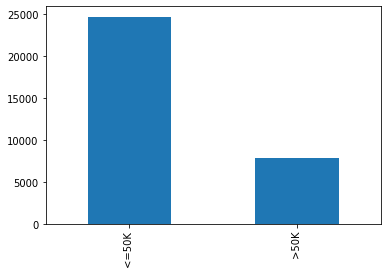

In [ ]:
df['income'].value_counts().plot(kind = 'bar'); 

There do not appear to be any inconsistecies in the categories.

- Lets check distributions of numerical values with histograms.

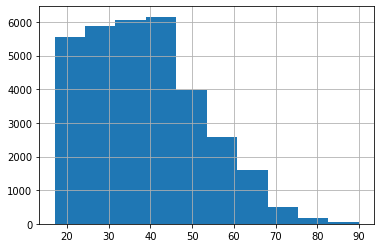

In [ ]:
df['age'].hist();

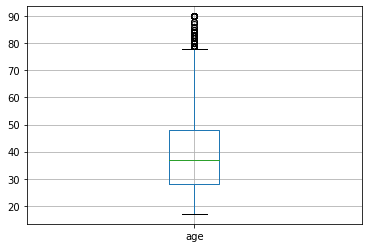

In [ ]:
df.boxplot(column = 'age');

There is a great presence of outliers for Age at the end of the distribution. but They're possible.
The age is is not greatly skewed, but it shows more repetitive values on the 20's to 40's.

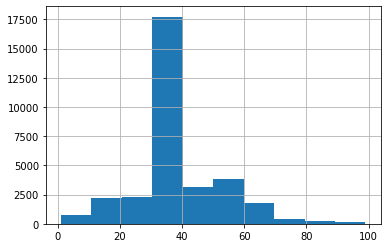

In [ ]:
df['hours-per-week'].hist();

- Heatmap and correlation between target and features

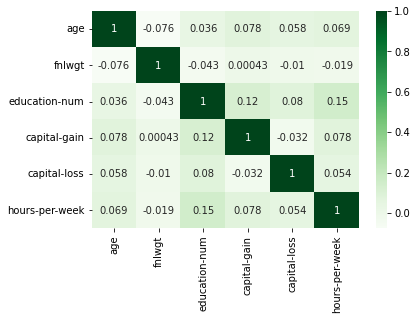

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap='Greens');

# **Project 2- Part 4 (Core)**
You are now entering into the model development phase of the project!

* Ensure that you complete the appropriate pre-processing steps
* Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)
* Evaluate model performance with appropriate metrics for the model
* Choose your "production" model and justify this decision
* Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!)
* Commit your code to GitHub
Submit the link to your GitHub repository.

##FEATURE ENGINEERING:

I want to check the balance of my target column. Using Normalize=True.

In [ ]:
df['income'].value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: income, dtype: float64

I decided I don't want to drop the values on the Dataset that contain '?'. In real life I'd consult with an specialist, but for this project, I will just change it to 'Unknown' that way is not a null value either.

In [ ]:
df.replace({' ?':' Unknown'}, inplace=True)

Cheking to see if the value ' ?' has changed:

In [ ]:
df.loc[df['native-country'] == ' ?', :].sum()

age               0.0
workclass         0.0
fnlwgt            0.0
education-num     0.0
marital-status    0.0
occupation        0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [ ]:
df.value_counts('workclass')

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

Let's do some exploration on other columns

In [ ]:
df.value_counts('sex')

sex
 Male      21775
 Female    10762
dtype: int64

In [ ]:
df.value_counts('age')

age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
86      1
87      1
Length: 73, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   race            32537 non-null  object
 7   sex             32537 non-null  object
 8   capital-gain    32537 non-null  int64 
 9   capital-loss    32537 non-null  int64 
 10  hours-per-week  32537 non-null  int64 
 11  native-country  32537 non-null  object
 12  income          32537 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.5+ MB


I still feel the need to explore a little bit more my dataset before building a model, so I will visualize a few more plots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


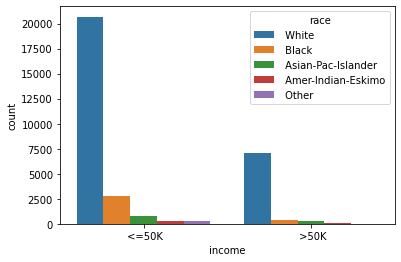

In [ ]:
sns.countplot(df['income'], hue='race', data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


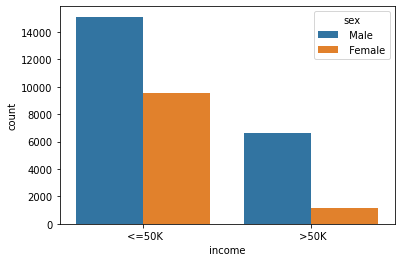

In [ ]:
sns.countplot(df['income'], hue='sex', data=df);

#Building Model:

# - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [ ]:
X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

In [ ]:
col_trans = make_column_transformer((ohe_encoder, cat_selector), (scaler, num_selector))

Instantiating and Tunning Logistic Regression:

In [ ]:
log_reg = LogisticRegression()  #Default paragrams
log_regpipe = make_pipeline(col_trans, log_reg)
log_regpipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b6d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b690>)])),
                ('logisticregression', LogisticRegression())])

In [ ]:
log_regpipetrainpreds = log_regpipe.predict(X_train)
log_regpipetestpreds = log_regpipe.predict(X_test)

print('\n')
print('Logistic Regression metrics on Training Data')
print('\n')
print(classification_report(y_train, log_regpipetrainpreds))
print('\n')
print('Logistic Regression metrics on Testing Data')
print('\n')
print(classification_report(y_test, log_regpipetestpreds))  



Logistic Regression metrics on Training Data


              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     18539
        >50K       0.74      0.60      0.66      5863

    accuracy                           0.85     24402
   macro avg       0.81      0.77      0.78     24402
weighted avg       0.85      0.85      0.85     24402



Logistic Regression metrics on Testing Data


              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6159
        >50K       0.74      0.62      0.68      1976

    accuracy                           0.86      8135
   macro avg       0.81      0.78      0.79      8135
weighted avg       0.85      0.86      0.85      8135



I will try now an l2 regularization, to see if the metrics report improves:

* **l2 Regularization**

In [ ]:
log_regpipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b6d0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b690>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'error',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'columntransformer__standardscaler__copy': True,
 'columntransformer__standardscaler__wi

Following code taken from notes and practice exercises on Learning Platform, classes and extra-curriculum self-learning activities.

{0.0001: 0.7689533644783214,
 0.001: 0.8300549135316777,
 0.1: 0.8515695434800427,
 1: 0.85259404966806,
 10: 0.8524711089254979,
 100: 0.8524301286779772,
 1000: 0.8523891484304565}

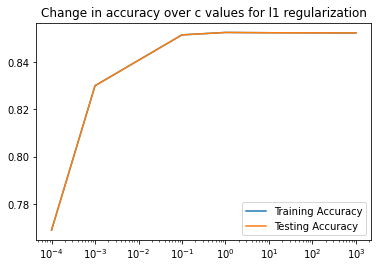

In [ ]:
c_values = [0.0001, 0.001, 0.1, 1, 10, 100, 1000] 

#Emptying Train and Test scores:

trainscores = []
testscores = []

for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=8000, random_state=42, penalty= 'l2')
  log_regpipe = make_pipeline(col_trans, log_reg)
  log_regpipe.fit(X_train, y_train)

  trainscores.append(log_regpipe.score(X_train, y_train))
  testscores.append(log_regpipe.score(X_train, y_train))

import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.plot(c_values, trainscores, label= 'Training Accuracy')
ax.plot(c_values, testscores, label= 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over c values for l1 regularization')
ax.legend()


ax.set_xscale('log')


{c:score for c, score in zip(c_values, testscores)}

* Logistic regression tunned with explored parameters:

In [ ]:
log_reg2 = LogisticRegression(C=10000, max_iter=9000, solver = 'liblinear', penalty = 'l2')
log_reg2pipe = make_pipeline(col_trans, log_reg2)
log_reg2pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b6d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b690>)])),
                ('logisticregression',
                 LogisticRegression(C=10000, max_iter=9000,
                                    solver='liblinear'))])

In [ ]:
log_reg2pipetrainpreds = log_reg2pipe.predict(X_train)
log_reg2pipetestpreds = log_reg2pipe.predict(X_test)

print('\n')
print('Logistic Regression metrics on Training Data')
print('\n')
print(classification_report(y_train, log_reg2pipetrainpreds))
print('\n')
print('Logistic Regression metrics on Testing Data')
print('\n')
print(classification_report(y_test, log_reg2pipetestpreds))  



Logistic Regression metrics on Training Data


              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     18539
        >50K       0.74      0.60      0.66      5863

    accuracy                           0.85     24402
   macro avg       0.81      0.77      0.78     24402
weighted avg       0.85      0.85      0.85     24402



Logistic Regression metrics on Testing Data


              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6159
        >50K       0.74      0.62      0.68      1976

    accuracy                           0.86      8135
   macro avg       0.81      0.78      0.79      8135
weighted avg       0.85      0.86      0.85      8135



After trying multiple params and going through the data cleaning stage, I achieved the best performing score of 85%. This is an improvement, as the first metrics reflected a weighted avg of 82%

# - Random Forest Classifier:

I will first try the Random Forest Classifier with default parameters:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rfpipe = make_pipeline(col_trans, rf)
rfpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b6d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b690>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
rfpipetrainpreds = rfpipe.predict(X_train)
rfpipetestpreds = rfpipe.predict(X_test)

print('\n')
print('Random Forest Classifier metrics on Training Data')
print('\n')
print(classification_report(y_train, rfpipetrainpreds))
print('\n')
print('Random Forest Classifier metrics on Testing Data')
print('\n')
print(classification_report(y_test, rfpipetestpreds))



Random Forest Classifier metrics on Training Data


              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     18539
        >50K       1.00      1.00      1.00      5863

    accuracy                           1.00     24402
   macro avg       1.00      1.00      1.00     24402
weighted avg       1.00      1.00      1.00     24402



Random Forest Classifier metrics on Testing Data


              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6159
        >50K       0.74      0.63      0.68      1976

    accuracy                           0.85      8135
   macro avg       0.81      0.78      0.79      8135
weighted avg       0.85      0.85      0.85      8135



I can see some overfitting on my data while checking the metrics report. I will see if this changes if I tune the parameters.

In [ ]:
rf_trainscore = rfpipe.score(X_train, y_train)
rf_testscore = rfpipe.score(X_test, y_test)
print(rf_trainscore)
print(rf_testscore)

0.9997950987623965
0.854578979717271


* Now let's check for tunable params:

In [ ]:
rfpipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b6d0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d79e7b690>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'error',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'columntransformer__standardscaler__copy': True,
 'columntransformer__standardscaler__wi

* **Tunning the max_depth:**

In [ ]:
rf9 = RandomForestClassifier(max_depth=9, random_state=42)
rfpipe9 = make_pipeline(col_trans, rf9)
rfpipe9.fit(X_train, y_train)
rfpipe9_train_score = rfpipe9.score(X_train, y_train)
rfpipe9_test_score = rfpipe9.score(X_test, y_test)
print(rfpipe9_train_score)
print(rfpipe9_test_score)

0.8627161708056716
0.8606023355869699


* Let's add another tune, by changing the amount of default 'trees' and going up on depth as well :

In [ ]:
rf_400 = RandomForestClassifier(max_depth=15, n_estimators = 400, random_state = 42)
rf_400pipe = make_pipeline(col_trans, rf_400)
rf_400pipe.fit(X_train, y_train)

rf_400_train_score = rf_400pipe.score(X_train, y_train)
rf_400_test_score = rf_400pipe.score(X_test, y_test)
print(rf_400_train_score)
print(rf_400_test_score)

0.8909515613474306
0.8661339889366934


**While the improvement might seem small by tunning the parameters to 400 trees, and changing the max_depth, there was definitely a positive change.**

Let's check the classification metrics report for the tunned Random Forest Classifier:

In [ ]:
rf_400pipetrainpreds = rf_400pipe.predict(X_train)
rf_400pipetestpreds = rf_400pipe.predict(X_test)

print('\n')
print('TUNNED Random Forest Classifier metrics on Training Data')
print('\n')
print(classification_report(y_train, rf_400pipetrainpreds))
print('\n')
print('TUNNED Random Forest Classifier metrics on Testing Data')
print('\n')
print(classification_report(y_test, rf_400pipetestpreds))



TUNNED Random Forest Classifier metrics on Training Data


              precision    recall  f1-score   support

       <=50K       0.90      0.97      0.93     18539
        >50K       0.87      0.65      0.74      5863

    accuracy                           0.89     24402
   macro avg       0.88      0.81      0.84     24402
weighted avg       0.89      0.89      0.89     24402



TUNNED Random Forest Classifier metrics on Testing Data


              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      6159
        >50K       0.81      0.58      0.68      1976

    accuracy                           0.87      8135
   macro avg       0.84      0.77      0.80      8135
weighted avg       0.86      0.87      0.86      8135



# * FINAL 'PRODUCTION' MODEL

I choose the Random Forest Classifier. It was the best performer and this is one of my favorite machine learning algorithms. Is easy to use and understand. It produced good predictions, while also solving a problem that gave me headaches: The overfitting of this dataset when used on default parameters.

# * CONCLUSIONS:

This project I chose to work on, could be very beneficial for different organizations. Both in the private or public sectors. As it can predict an 'income' factor, which has great impact not also in our personal life, or in a country's betterment, but for example if it's a private sector company, the analysis on income and focusing on job satisfaction could be beneficial and a good option to explore if there is a demonstrated employee attrittion at the work place. 

My model would be a very resourceful tool for making accurate predictions needed in strategic decision making in any organization. It can be used in a different setting with a different dataset as well. 

Based on this projetc analysis, I think that If we make decisions based on deeply analyzed factors, numbers, and we get artificial intelligence predictions, the chances of making mistakes in the future reduces exponentially. 